# Problem Statement

# Perform sentimental analysis:

# 1) Extract reviews of any product from ecommerce website like amazon

# 2) Perform emotion mining

# 1. Import Libraries

In [1]:
import re
import nltk
import spacy
import codecs
import requests

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from textblob import TextBlob
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook
from wordcloud import WordCloud
from nltk.corpus import stopwords
from bs4 import BeautifulSoup as bs
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

C:\Users\vishn\AppData\Local\Programs\Python\Python311\Lib\site-packages\cupy\_environment.py:216: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(
C:\Users\vishn\AppData\Local\Programs\Python\Python311\Lib\site-packages\cupy\_environment.py:216: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(
C:\Users\vishn\AppData\Local\Programs\Python\Python311\Lib\site-packages\cupy\_environment.py:216: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(


# 2. Multi-page web-scraping

In [2]:
headers = {'authority': 'www.amazon.in',
           'accept-language': 'en-US,en;q=0.9',
           'referer': 'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/dp/B0B574QXFL/ref=sr_1_3?adgrpid=66314740727&ext_vrnc=hi&gclid=CjwKCAiAheacBhB8EiwAItVO27OqojMgIrqr8l4RkhJXVEgEYEy5H4Hv_ggVfrdU-8RF6WYv_aDItRoCKvwQAvD_BwE&hvadid=398059830400&hvdev=c&hvlocphy=1007768&hvnetw=g&hvqmt=b&hvrand=1335892987492695214&hvtargid=kwd-1434352673191&hydadcr=24569_1971431&keywords=boat+xtend+pro&qid=1671035479&sr=8-3',
           'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}

# Looping through multiple pages

In [3]:
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [4]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
                      'Rating':float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                      'Review':item.find('span', {'data-hook': 'review-body'}).text.strip(),
                      'Review_Date':item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India 🇮🇳 on', 'Reviewed in India on').strip()}
            reviewlist.append(review)
    except:
        pass

In [23]:
for x in(range(160)):
    soup = get_soup(f'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/product-reviews/B0B574QXFL/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

Exception ignored in: <function tqdm.__del__ at 0x0000019EC7896E80>
Traceback (most recent call last):
  File "C:\Users\vishn\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\std.py", line 1149, in __del__
    self.close()
  File "C:\Users\vishn\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\notebook.py", line 278, in close
    self.disp(bar_style='danger', check_delay=False)
    ^^^^^^^^^
AttributeError: 'tqdm_notebook' object has no attribute 'disp'
Exception ignored in: <function tqdm.__del__ at 0x0000019EC7896E80>
Traceback (most recent call last):
  File "C:\Users\vishn\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\std.py", line 1149, in __del__
    self.close()
  File "C:\Users\vishn\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\notebook.py", line 278, in close
    self.disp(bar_style='danger', check_delay=False)
    ^^^^^^^^^
AttributeError: 'tqdm_notebook' object has no attribute 'disp'
Exception ignored in: <funct

# Save results to a Dataframe, then export as CSV

In [24]:
df = pd.DataFrame(reviewlist)
df

,Title,Rating,Review,Review_Date
0,3.0 out of 5 stars\nNOt worth the money,3.0,Review OverviewAverage2.7The Boat today launch...,Reviewed in India on 17 May 2022
1,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,Reviewed in India on 12 August 2021
2,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,Reviewed in India on 9 August 2022
3,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,Reviewed in India on 27 August 2023
4,4.0 out of 5 stars\nGood budget smart watch wi...,4.0,Pros:1. Premium build quality with matte finis...,Reviewed in India on 16 December 2021
...,...,...,...,...
215,"3.0 out of 5 stars\nUseless item, show pcs only",3.0,The media could not be loaded.\n ...,Reviewed in India on 18 October 2023
216,3.0 out of 5 stars\nGood Performance,3.0,Overall the product is great but can improve b...,Reviewed in India on 24 September 2023
217,4.0 out of 5 stars\nDon't expect much feaures ...,4.0,"As like other boat products, budget-friendly a...",Reviewed in India on 15 August 2023
218,5.0 out of 5 stars\nGood 👍,5.0,Watch is good in look and features and battery...,Reviewed in India on 26 October 2023


In [25]:
df["Review_Date"] = df["Review_Date"].replace('Reviewed in India on','', regex=True)

In [26]:
df.head(50)

,Title,Rating,Review,Review_Date
0,3.0 out of 5 stars\nNOt worth the money,3.0,Review OverviewAverage2.7The Boat today launch...,17 May 2022
1,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
2,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,9 August 2022
3,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,27 August 2023
4,4.0 out of 5 stars\nGood budget smart watch wi...,4.0,Pros:1. Premium build quality with matte finis...,16 December 2021
5,4.0 out of 5 stars\nNice watch,4.0,It is very nice watch working properly price r...,18 November 2023
6,3.0 out of 5 stars\nGood watch but bit tricky ...,3.0,1. Good for Bluetooth calling but very difficu...,15 November 2023
7,4.0 out of 5 stars\nGood quality watch in budg...,4.0,Its a good quality watch if you are on a budge...,29 October 2023
8,4.0 out of 5 stars\nDamage,4.0,Damage,15 November 2023
9,4.0 out of 5 stars\nLooking good this one also...,4.0,Changed product,10 November 2023


In [27]:
df.to_csv("BoatSmartWatch_Review.csv")

# 3. Load Dataset

In [28]:
reviews = pd.read_csv('BoatSmartWatch_Review.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

,Title,Rating,Review,Review_Date
0,3.0 out of 5 stars\nNOt worth the money,3.0,Review OverviewAverage2.7The Boat today launch...,17 May 2022
1,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
2,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,9 August 2022
3,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,27 August 2023
4,4.0 out of 5 stars\nGood budget smart watch wi...,4.0,Pros:1. Premium build quality with matte finis...,16 December 2021
...,...,...,...,...
215,"3.0 out of 5 stars\nUseless item, show pcs only",3.0,The media could not be loaded.\n ...,18 October 2023
216,3.0 out of 5 stars\nGood Performance,3.0,Overall the product is great but can improve b...,24 September 2023
217,4.0 out of 5 stars\nDon't expect much feaures ...,4.0,"As like other boat products, budget-friendly a...",15 August 2023
218,5.0 out of 5 stars\nGood 👍,5.0,Watch is good in look and features and battery...,26 October 2023


# 4. Data Exploration

In [29]:
reviews.Rating.describe()

count    220.000000
mean       3.900000
std        0.556407
min        3.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: Rating, dtype: float64

In [30]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        220 non-null    object 
 1   Rating       220 non-null    float64
 2   Review       216 non-null    object 
 3   Review_Date  220 non-null    object 
dtypes: float64(1), object(3)
memory usage: 7.0+ KB


In [31]:
reviews.isna().sum()

Title          0
Rating         0
Review         4
Review_Date    0
dtype: int64

In [32]:
reviews.dropna(subset=['Review'],inplace=True)
reviews.head()

,Title,Rating,Review,Review_Date
0,3.0 out of 5 stars\nNOt worth the money,3.0,Review OverviewAverage2.7The Boat today launch...,17 May 2022
1,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
2,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,9 August 2022
3,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,27 August 2023
4,4.0 out of 5 stars\nGood budget smart watch wi...,4.0,Pros:1. Premium build quality with matte finis...,16 December 2021


# 5. Data Visualization

# Date vs Review Count

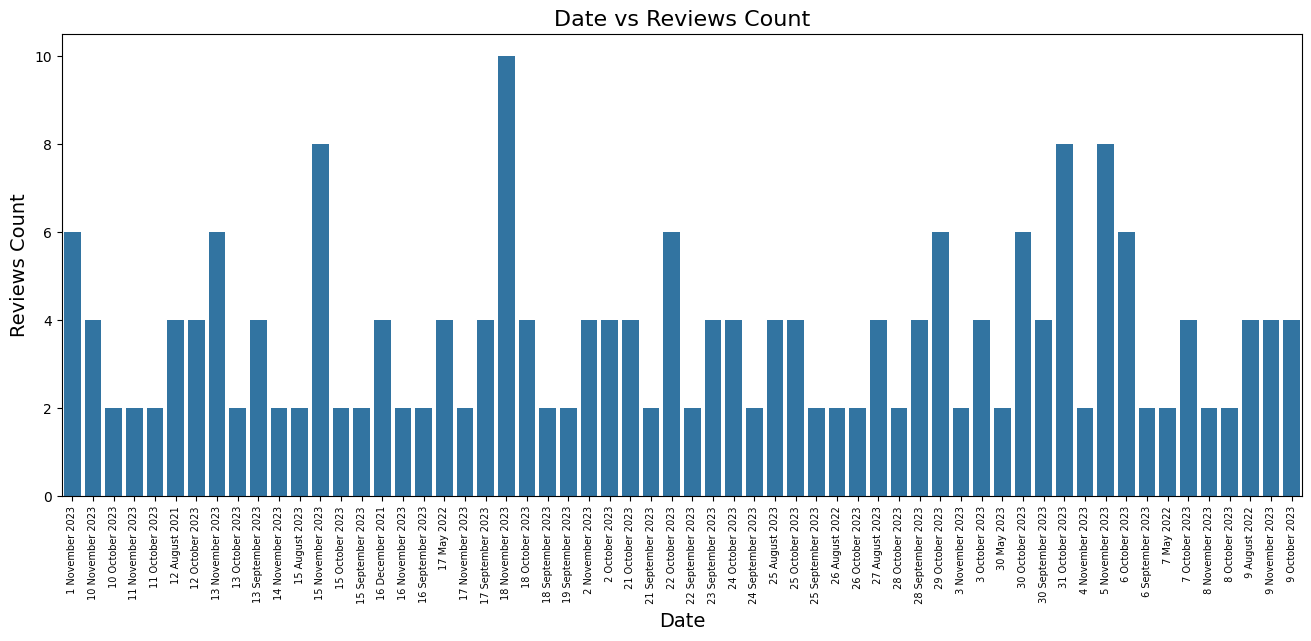

In [33]:
#Creating a dataframe
dayreview = pd.DataFrame(reviews.groupby('Review_Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Review_Date']
dayreview.sort_values(by = ['Review_Date'])

#Plotting the graph
plt.figure(figsize=(16,6))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews Count', fontsize=16)
plt.xticks(rotation=90,fontsize=7)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Reviews Count',fontsize=14)
plt.show()

# Percentage of Ratings

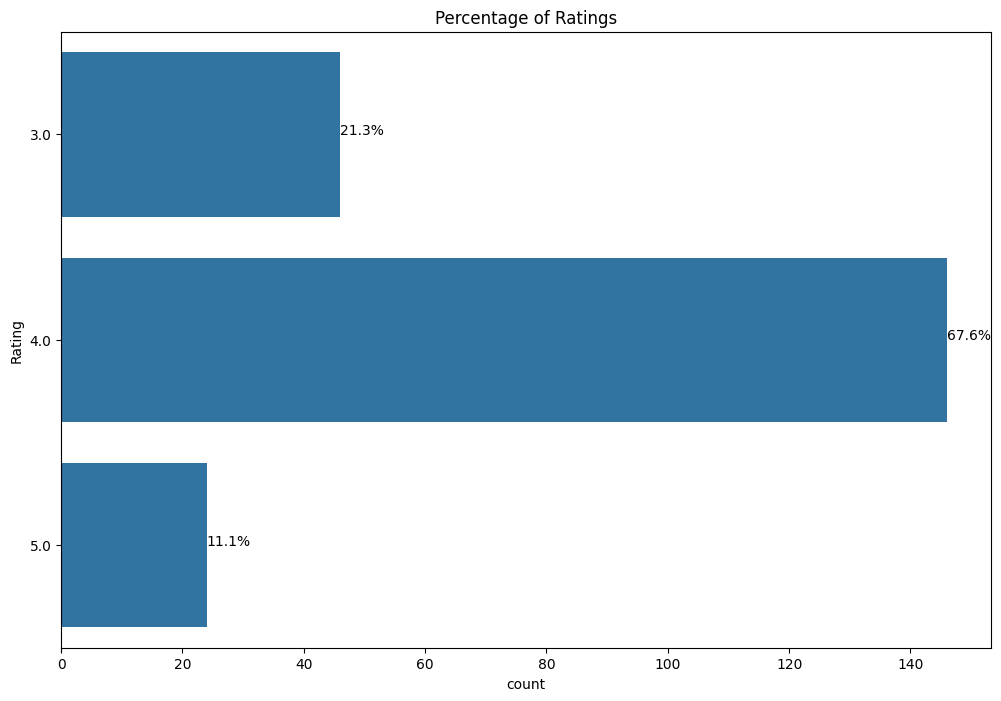

In [34]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

# 6. BasicText Preprocessing for Sentiment Analysis

# Spelling Correction

In [35]:
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    Review OverviewAverage2.The Coat today launche...
1    The media could not be loaded.\n              ...
2    Shipping the parts mostly covered in other rev...
3    His smart (model Coat extend plus) watch is sa...
4    Gros:1. Premium build quality with matter fini...
Name: Review, dtype: object

In [36]:
boat_review = reviews[['Review']]
boat_review

,Review
0,Review OverviewAverage2.7The Boat today launch...
1,The media could not be loaded.\n ...
2,Skipping the parts mostly covered in other rev...
3,This smart (model Boat extend plus) watch is f...
4,Pros:1. Premium build quality with matte finis...
...,...
215,The media could not be loaded.\n ...
216,Overall the product is great but can improve b...
217,"As like other boat products, budget-friendly a..."
218,Watch is good in look and features and battery...


# Resetting index

In [37]:
boat_review.reset_index(drop=True, inplace=True)

In [38]:
stop_words = stopwords.words('english')
boat_review['Review'] = boat_review['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() if x not in stop_words))

# Lemmatizer

In [40]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in(range(0, len(boat_review))):
    cleaned = re.sub('[^a-zA-Z]', " ", boat_review["Review"][i])
    cleaned = cleaned.lower()
    cleaned = cleaned.split()
    cleaned = [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned = ' '.join(cleaned)
    corpus.append(cleaned)

Exception ignored in: <function tqdm.__del__ at 0x0000019EC7896E80>
Traceback (most recent call last):
  File "C:\Users\vishn\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\std.py", line 1149, in __del__
    self.close()
  File "C:\Users\vishn\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\notebook.py", line 278, in close
    self.disp(bar_style='danger', check_delay=False)
    ^^^^^^^^^
AttributeError: 'tqdm_notebook' object has no attribute 'disp'


In [41]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": boat_review.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
3,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
4,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...


# 7. Text Pre-processing Techniques

# A. Removing '@names'

In [42]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [43]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
3,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
4,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...
5,nice watch working properly price range nice m...,it nice watch working properly price range nic...
6,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...
7,good quality watch budget cannot used tracking...,"its good quality watch budget, cannot used tra..."
8,damage,damage
9,changed product,changed product


# B. Removing links (http | https)

In [44]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
3,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
4,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...
5,nice watch working properly price range nice m...,it nice watch working properly price range nic...
6,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...
7,good quality watch budget cannot used tracking...,"its good quality watch budget, cannot used tra..."
8,damage,damage
9,changed product,changed product


# C. Removing Review with empty text

In [45]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
3,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
4,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...
5,nice watch working properly price range nice m...,it nice watch working properly price range nic...
6,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...
7,good quality watch budget cannot used tracking...,"its good quality watch budget, cannot used tra..."
8,damage,damage
9,changed product,changed product


# D. Dropping duplicate rows

In [46]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
3,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
4,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...
5,nice watch working properly price range nice m...,it nice watch working properly price range nic...
6,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...
7,good quality watch budget cannot used tracking...,"its good quality watch budget, cannot used tra..."
8,damage,damage
9,changed product,changed product


# E. Function to remove emoji

In [47]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [48]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
3,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
4,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...
5,nice watch working properly price range nice m...,it nice watch working properly price range nic...
6,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...
7,good quality watch budget cannot used tracking...,"its good quality watch budget, cannot used tra..."
8,damage,damage
9,changed product,changed product


# F. Removing Stop words

In [49]:
with codecs.open("stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [50]:
stop.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [51]:
my_stop_words = stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
3,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
4,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...
5,nice watch working properly price range nice m...,it nice watch working properly price range nic...
6,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...
7,good quality watch budget cannot used tracking...,"its good quality watch budget, cannot used tra..."
8,damage,damage
9,changed product,changed product


# G. Tokenize 'Clean_Reviews'

In [52]:
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['medium', 'could', 'loaded', 'used', 'watch', 'month', 'bought', 'first', 'sale', 'keep', 'reading', 'unbiased', 'review', 'tip', 'trick', 'ensure', 'function', 'watch', 'working', 'smoothly', 'large', 'curved', 'display', 'price', 'category', 'inch', 'battery', 'heavy', 'usage', 'frequently', 'waking', 'screen', 'alexa', 'alarm', 'notification', 'day', 'standby', 'checking', 'time', 'occassionally', 'day', 'pretty', 'good', 'full', 'charging', 'time', 'hour', 'decent', 'quality', 'magnetic', 'charging', 'cable', 'provided', 'use', 'low', 'power', 'adapter', 'power', 'bank', 'laptop', 'necessary', 'health', 'workout', 'tracking', 'option', 'spo', 'oxymeter', 'heart', 'rate', 'monitor', 'accuracy', 'sleep', 'tracking', 'pretty', 'accurate', 'paedometer', 'accurate', 'time', 'sometimes', 'hundred', 'step', 'added', 'randomly', 'without', 'activity', 'happens', 'randomly', 'day', 'stress', 'monitor', 'also', 'sure', 'calculated', 'sensor', 'fake', 'probably', 'watch', 'contact',

In [53]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [review, overviewaverage, boat, today, launche...
1    [medium, could, loaded, used, watch, month, bo...
2    [skipping, part, mostly, covered, review, spon...
3    [smart, model, boat, extend, plus, watch, func...
4    [pro, premium, build, quality, matte, finishin...
5    [nice, watch, working, properly, price, range,...
6    [good, bluetooth, calling, difficult, use, blu...
7    [good, quality, watch, budget, cannot, used, t...
8                                             [damage]
9                                   [changed, product]
Name: Clean_Reviews, dtype: object

In [54]:
dataframe['Tokenized_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...,"[review, overviewaverage, boat, today, launche..."
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....,"[medium, could, loaded, used, watch, month, bo..."
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...,"[skipping, part, mostly, covered, review, spon..."
3,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...,"[smart, model, boat, extend, plus, watch, func..."
4,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...,"[pro, premium, build, quality, matte, finishin..."
5,nice watch working properly price range nice m...,it nice watch working properly price range nic...,"[nice, watch, working, properly, price, range,..."
6,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...,"[good, bluetooth, calling, difficult, use, blu..."
7,good quality watch budget cannot used tracking...,"its good quality watch budget, cannot used tra...","[good, quality, watch, budget, can, not, used,..."
8,damage,damage,[damage]
9,changed product,changed product,"[changed, product]"


# H. Converting words to Stemmer

In [55]:
stemmer = SnowballStemmer("english")

In [56]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,review overviewaverag boat today launch boat x...
1,medium could load use watch month bought first...
2,skip part most cover review sponsor yt one add...
3,smart model boat extend plus watch function we...
4,pro premium build qualiti matt finish sturdi p...
...,...
211,medium could load useless item tri connect cus...
212,overal product great improv better give call m...
213,like boat product budget friend suitabl rough ...
214,watch good look featur batteri long last charg...


# I. Converting words to Lemma

In [57]:
word_lemmatizer = WordNetLemmatizer()
yy = pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

,stemmed
0,review overviewaverage boat today launched boa...
1,medium could loaded used watch month bought fi...
2,skipping part mostly covered review sponsored ...
3,smart model boat extend plus watch functioning...
4,pro premium build quality matte finishing stur...
...,...
211,medium could loaded useless item trying connec...
212,overall product great improve better giving ca...
213,like boat product budget friendly suitable rou...
214,watch good look feature battery long lasted ch...


# 8. Basic Feature Extaction

# A. Applying bag of Words without N grams

In [58]:
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

# B. CountVectorizer with N-grams (Bigrams & Trigrams)

In [67]:
dataframe = dataframe.reset_index(drop=True)

In [68]:
ps = PorterStemmer()
corpus = []
for i in(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [69]:
corpus[3]

'smart model boat extend plu watch function well worth price r batteri begin last day next charg last day last settl one day extens user app amol display good touch featur good access app easili reachabl simpl brows featur sleep measur good take day time nap night time show exactli went sleep woke spo measur neaarer measur person digit instrument heart rate measur also nearer instrument stress also reflect nearli real condit activ step show correct distanc also good watch take bike ride walk show distanc cover set target sport featur check yet fulli check featur function water resist ye water resist check bath drizzl rain time display good number display avail cloud suffici alway featur work model avail featur pleas could skin made avail display wrist put rest rais respect featur function featur alway enabl otherwis function bluetooth call featur good speaker loud enough take call use listen audio video walk ofcours batteri drain quickli messag ye good see notif flash light function ok

# Applying Countvectorizer (Creating the Bag of Words model)

In [70]:
cv = CountVectorizer(max_features=1546,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [71]:
X.shape

(214, 1546)

In [75]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [78]:
count_df = pd.DataFrame(X)
count_df

,0,1,2,3,4,5,6,7,8,9,...,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545
0,0,1,0,4,3,0,0,1,0,0,...,2,2,0,0,20,7,1,1,0,0
1,0,0,1,3,1,1,1,3,0,1,...,0,0,0,0,1,0,1,1,0,0
2,1,1,0,0,1,0,0,6,1,1,...,0,0,1,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,1,1,0,...,0,0,1,0,0,0,0,2,0,0
4,3,0,0,3,1,1,1,0,0,1,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
210,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
211,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
212,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# C. TF-IDF Vectorizer

In [79]:
ps = PorterStemmer()
corpus = []
for i in(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [80]:
corpus[4]

'pro premium build qualiti matt finish sturdi polycarbon frame good soft silicon strap r absolut flush bodi watch attract trendi colour heart rate except heart rate spike weight train pedomet step counter accur spo compar puls oximet read smart watch offer accuraci sleep track accur bed time wake time durat stage sleep inaccur light deep sleep wake detect rem sleep detect sleep data watch synchronis smoothli boat wave app issu warn msg watch worn hand properli detect data surfac larg clear bright sharp lcd ip display even sun touch smooth experienc jitter ui also lag time attach temper glass sometim function requir tap work accept scroll respons finger move diagon instead vertic app gp work superbl excel rout track map featur advertis descript bluetooth connect good mobil kept close proxim boat wave app must remain run background time definit splash proof though nt take risk submerg watch notif work problem call alert sm msg social medium app notif lag though provis sec lag turn alexa 

# Applying TF-IDF Vectorizer

In [81]:
tfidf_v = TfidfVectorizer(max_features=1546,ngram_range=(1,3))
X = tfidf_v.fit_transform(corpus).toarray()

In [82]:
X.shape

(214, 1546)

In [84]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [85]:
count_df = pd.DataFrame(X)
count_df

,0,1,2,3,4,5,6,7,8,9,...,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545
0,0.000000,0.014227,0.000000,0.054965,0.037701,0.000000,0.000000,0.013309,0.000000,0.000000,...,0.03699,0.03699,0.000000,0.00000,0.284549,0.129465,0.015432,0.014783,0.0,0.000000
1,0.000000,0.000000,0.029436,0.070600,0.021522,0.027764,0.027764,0.068380,0.000000,0.024366,...,0.00000,0.00000,0.000000,0.00000,0.024366,0.000000,0.026429,0.025318,0.0,0.000000
2,0.028508,0.026282,0.000000,0.000000,0.023215,0.000000,0.000000,0.147515,0.029948,0.026282,...,0.00000,0.00000,0.026282,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.031751
3,0.000000,0.039469,0.000000,0.000000,0.000000,0.000000,0.000000,0.036922,0.044974,0.000000,...,0.00000,0.00000,0.039469,0.00000,0.000000,0.000000,0.000000,0.082023,0.0,0.000000
4,0.089130,0.000000,0.000000,0.079364,0.024194,0.031211,0.031211,0.000000,0.000000,0.027391,...,0.00000,0.00000,0.027391,0.03309,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
210,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
211,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


# D. Named Entity Recognition (NER)

In [86]:
reviews = [review.strip() for review in dataframe.Clean_Reviews]
reviews = [comment for comment in reviews if comment]
# Joining the list into one string/text
reviews_text = ' '.join(reviews)
reviews_text[0:2000]

'review overviewaverage boat today launched boat xtend company latest budget smartwatch price tag r boat xtend smartwatch come stylish design resembling apple watch moreover built amazon alexa support spo tracking stress tracking much coming budget segment worth buy smartwatch query nothing worry detailed review boat xtend smartwatch clear doubt contentsbox contentdesign build comfortdisplaywatch ui featuresalexa supportwatch facesboat wave appaccuracybatteryfinal wordsbuy box contentboat xtend box contentsmartwatch black gold colourcharging clipuser manual warranty carddesign build comfortwhen buying smartwatch one always think design look apart feature design build another major aspect one take care buying smartwatch boat worked design time brings premium side term look design inspired apple watch cannot compared obviously every aspect apple watch would much better boat xtend smartwatch redmi watch well amazfit bip u pro shape design build quality much premium one boat xtend design b

# Parts Of Speech (POS) Tagging

In [87]:
nlp = spacy.load('en_core_web_sm')

one_block = reviews_text[0:2000]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [88]:
for token in doc_block[:50]:
    print(token,token.pos_)

review NOUN
overviewaverage NOUN
boat NOUN
today NOUN
launched VERB
boat NOUN
xtend NOUN
company NOUN
latest ADJ
budget NOUN
smartwatch NOUN
price NOUN
tag NOUN
r NOUN
boat NOUN
xtend NOUN
smartwatch NOUN
come VERB
stylish ADJ
design NOUN
resembling VERB
apple NOUN
watch NOUN
moreover ADV
built VERB
amazon PROPN
alexa ADJ
support NOUN
spo NOUN
tracking VERB
stress NOUN
tracking VERB
much ADJ
coming VERB
budget NOUN
segment NOUN
worth ADJ
buy VERB
smartwatch NOUN
query NOUN
nothing PRON
worry VERB
detailed ADJ
review NOUN
boat NOUN
xtend NOUN
smartwatch NOUN
clear ADJ
doubt PROPN
contentsbox PROPN


# Filtering the nouns and verbs only

In [89]:
nlp.max_length =  1222000
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['believe', 'gold', 'color', 'fade', 'time', 'color', 'variant', 'look', 'one', 'opinion', 'color', 'scheme', 'find', 'color', 'scheme', 'boat', 'xtend', 'watch', 'water', 'resistance', 'silicon', 'strap', 'strap', 'quality', 'strap', 'find', 'usage', 'displaycoming', 'display', 'watch', 'shape', 'display', 'see', 'panel', 'screen', 'bezel', 'part', 'screen', 'go', 'notice', 'bezel', 'screen', 'quality', 'feel', 'display', 'complain', 'watch', 'offer', 'screen', 'time', 'level', 'brightness', 'control', 'boat', 'xtend', 'display', 'qualityi', 'find', 'display', 'quality', 'boat', 'xtend', 'smartwatch', 'smartwatch', 'boat', 'view', 'angle', 'one', 'see', 'content', 'smartwatch', 'sunlight', 'saturated', 'complain', 'price', 'range', 'watch', 'smartwatch', 'use', 'button', 'watch', 'work', 'power', 'button', 'button', 'display', 'display', 'work', 'problem', 'animation', 'bar', 'menu', 'navigation', 'simple', 'find', 'use', 'watch', 'lag', 'bit', 'company']


# Counting the noun & verb tokens

In [90]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['word','count']
wd_df[0:10]

,word,count
0,watch,394
1,boat,188
2,feature,164
3,time,132
4,day,124
5,display,106
6,battery,102
7,smartwatch,100
8,app,94
9,xtend,88


# Visualizing results (Barchart for top 10 nouns + verbs)

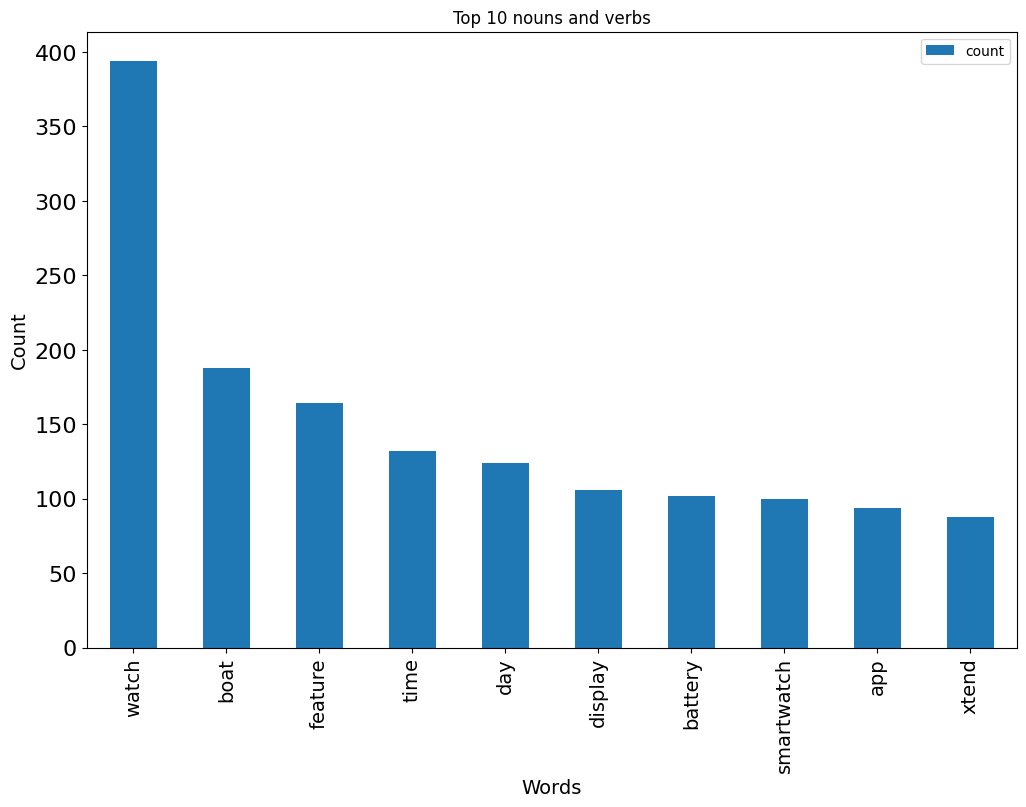

In [91]:
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs', fontsize=16)
plt.xticks(rotation=90,fontsize=14)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

# 9. Feature Extraction

# A. BOW Features

In [92]:
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

# B. TF-IDF Features

In [93]:
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

# 10. Fetch sentiments Using TextBlob

In [94]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [95]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda reviews_text: fetch_sentiment_using_textblob(reviews_text))
pd.DataFrame(sentiments_using_textblob.value_counts())

,count
Clean_Reviews,
pos,202
neg,12


# Let's calculate subjectivity and Polarity

In [96]:
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity
 
# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity
 
dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...,"[review, overviewaverage, boat, today, launche...",0.427641,0.202171
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....,"[medium, could, loaded, used, watch, month, bo...",0.472013,0.129274
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...,"[skipping, part, mostly, covered, review, spon...",0.441033,-0.001266
3,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...,"[smart, model, boat, extend, plus, watch, func...",0.450855,0.320452
4,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...,"[pro, premium, build, quality, matte, finishin...",0.533112,0.292296


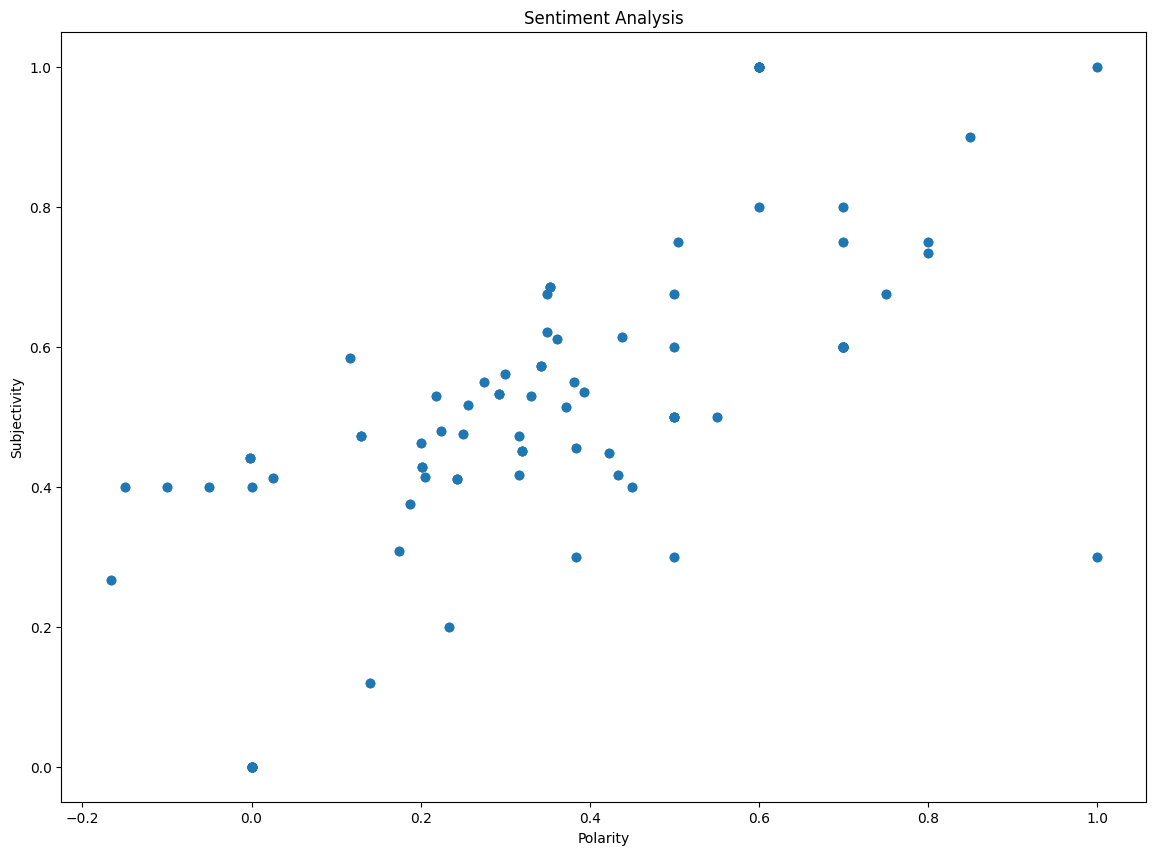

In [97]:
f, axes = plt.subplots(figsize = (14,10))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity');

In [98]:
dataframe['sentiment'] = sentiments_using_textblob
dataframe.to_csv("clean_review.csv",index=False)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity,sentiment
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...,"[review, overviewaverage, boat, today, launche...",0.427641,0.202171,pos
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....,"[medium, could, loaded, used, watch, month, bo...",0.472013,0.129274,pos
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...,"[skipping, part, mostly, covered, review, spon...",0.441033,-0.001266,neg
3,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...,"[smart, model, boat, extend, plus, watch, func...",0.450855,0.320452,pos
4,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...,"[pro, premium, build, quality, matte, finishin...",0.533112,0.292296,pos


# 11. Story Generation and Visualization

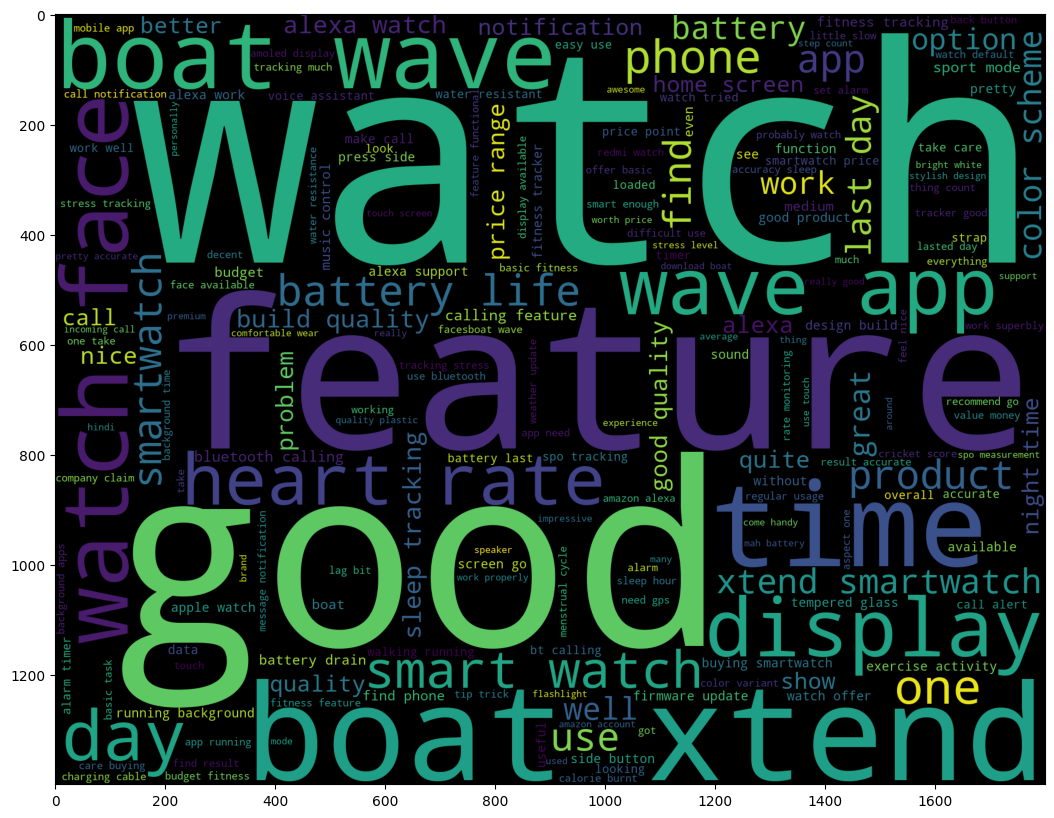

In [99]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(14,10))
wordcloud= WordCloud(background_color = 'black', width = 1800, height =1400).generate(allWords_)
plt.imshow(wordcloud);

# A. Most common words in positive Review

In [100]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

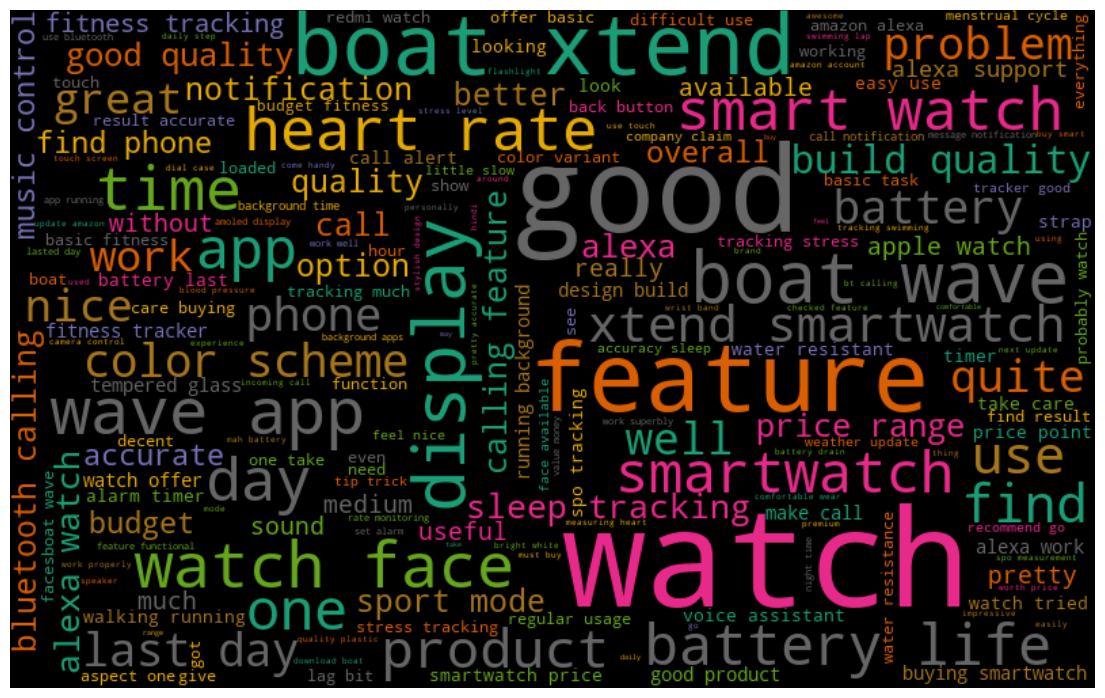

In [101]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)

# B. Most common words in negative Review

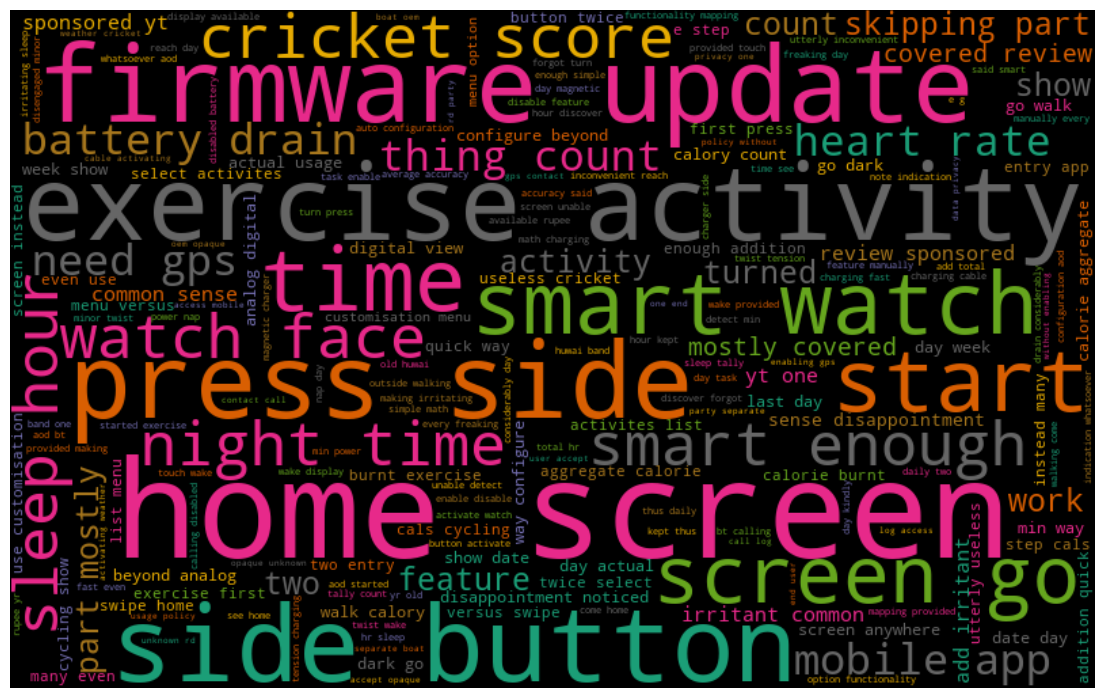

In [102]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(all_words)

# THE END